<a href="https://colab.research.google.com/github/thogeti/ALMLPract/blob/master/SpamTextMsgNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs= -1))])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[224,   1],
       [ 27, 197]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [ ]:
accuracy_score(y_test,y_pred)

0.9376391982182628

In [ ]:
clf.predict(["Hi this is prav"])

array(['ham'], dtype=object)

In [ ]:
clf.predict(["you have won free tickets.TEXT 'WON' to 55566"])

array(['spam'], dtype=object)

## **NLP Tutorial - Spam Text Message**


*   Spam Filters
*   Voice Text messaging
*  Text Classification
*   Sentiment Analysis
*   Spell and Grammer check
*   Search Suggestion
*   Chat Bot
*   Search Auto Correction
*   Automatic Review Analysis System
*  Machine TranslationList item
  



*   Natural Language understanding ( Text Classifiation)
*   Natural language Generation ( Text Generation)




##  **Natural Language understanding ( Text Classifiation)**


In [1]:
!pip install scikit-learn

In [ ]:
#!pip instal -U spacy

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

In [5]:
#df = pd.read_csv(r"C:\Praveen\Books\AI-ML-DL\Example\KGP Talkie\All-CSV-ML-Data-Files-Download-master\spam.tsv")

#import os
print(os.getcwd())
os.chdir("C:/Praveen/Books/AI-ML-DL/Example/KGP Talkie/All-CSV-ML-Data-Files-Download-master")
print(os.getcwd())
df = pd.read_csv('spam.tsv',nrows=10)
print(df.head())

/content


FileNotFoundError: ignored

In [9]:
from google.colab import files
uploaded = files.upload()

Saving spam.tsv to spam.tsv


In [12]:
df = pd.read_csv( 'spam.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [13]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

**Balance the Data**

In [17]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [18]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [20]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [21]:
ham = ham.sample(spam.shape[0])

In [22]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [23]:
data = ham.append(spam, ignore_index= True)
#data.reset_index(inplace=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


## **Exploratory data analysis**

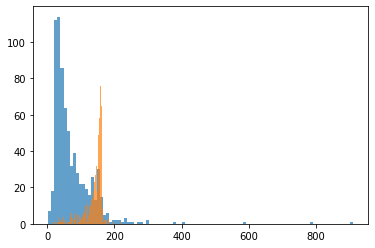

In [27]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

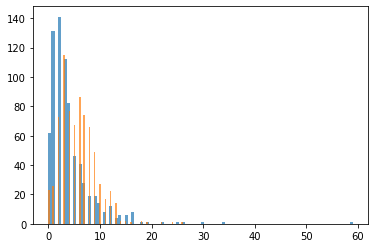

In [28]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

## **Data preparation**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
data.head()

,label,message,length,punct
0,ham,Ok i wont call or disturb any one. I know all ...,84,2
1,ham,Dude avatar 3d was imp. At one point i thought...,124,1
2,ham,What's a feathery bowa? Is that something guys...,76,4
3,ham,Babe? You said 2 hours and it's been almost 4 ...,73,6
4,ham,Remember all those whom i hurt during days of ...,184,4


In [41]:
X_train, X_test,y_train, y_test = train_test_split(data['message'],data['label'], test_size =0.3, random_state=0, shuffle = True,stratify=data['label'])

In [35]:
y_train

1128    spam
742      ham
477      ham
542      ham
1277    spam
        ... 
1211    spam
312      ham
268      ham
272      ham
1222    spam
Name: label, Length: 1045, dtype: object

### **Bag of Words**

In [36]:
vectorizer = TfidfVectorizer()

In [37]:
X_train = vectorizer.fit_transform(X_train)

In [38]:
X_train.shape

(1045, 3724)

## **PipeLine and RandomForest**

In [39]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs= -1))])

In [42]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [43]:
y_pred = clf.predict(X_test)

In [44]:
confusion_matrix(y_test,y_pred)

array([[224,   1],
       [ 27, 197]])

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [46]:
accuracy_score(y_test,y_pred)

0.9376391982182628

In [47]:
clf.predict(["Hi this is prav"])

array(['ham'], dtype=object)

In [49]:
clf.predict(["you have won free tickets.TEXT 'WON' to 55566"])

array(['spam'], dtype=object)

## **SVN Classifier**

In [84]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C = 700,gamma= 'auto'))])

In [85]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=700, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [86]:
y_pred = clf.predict(X_test)

In [87]:
confusion_matrix(y_test,y_pred)

array([[222,   3],
       [ 18, 206]])

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.95       225
        spam       0.99      0.92      0.95       224

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



In [89]:
accuracy_score(y_test,y_pred)

0.9532293986636972

In [90]:
clf.predict(["Hi this is prav"])

array(['ham'], dtype=object)

In [91]:
clf.predict(["you have won free tickets.TEXT 'WON' to 55566"])

array(['spam'], dtype=object)